In [1]:

import pandas as pd
import numpy as np

#scaling: Box-Cox Trasformation
from scipy import stats 

#normalization: min_max scaling
from mlxtend.preprocessing import minmax_scaling

#plot
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#read
KSdata = pd.read_csv('KS.csv', encoding='ISO-8859-1')

C:\Users\h0817\AppData\Local\Temp\ipykernel_24260\4292481623.py:2: DtypeWarning: Columns (6,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  KSdata = pd.read_csv('KS.csv', encoding='ISO-8859-1')


In [3]:
KSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

In [4]:
KSdata.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015/10/9 11:36,1000,2015/8/11 12:12,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013/2/26 00:20,45000,2013/1/12 00:20,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012/4/16 04:24,5000,2012/3/17 03:24,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015/8/29 01:00,19500,2015/7/4 08:35,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016/4/1 13:38,50000,2016/2/26 13:38,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Scaling 標準化
        
        ● scale the range, not distribution shape 不改變分布形狀，改變縮放比例
            EX：original data, $0 to $10000000 ->  0-1
        ● the extreme values could lead to  model instablility 具極端值可能導致model不穩定

        method
        ●Min-Max Scaling
            將數據縮放到固定範圍（如 0 到 1）。

[[1.0000e+03]
 [4.5000e+04]
 [5.0000e+03]
 [1.9500e+04]
 [5.0000e+04]
 [1.0000e+03]
 [2.5000e+04]
 [1.2500e+05]
 [6.5000e+04]
 [2.5000e+03]
 [1.2500e+04]
 [5.0000e+03]
 [2.0000e+05]
 [2.5000e+03]
 [1.5000e+03]
 [3.0000e+03]
 [2.5000e+02]
 [5.0000e+03]
 [2.0000e+04]
 [3.5000e+03]
 [5.0000e+02]
 [1.7500e+02]
 [1.0000e+04]
 [1.2000e+04]
 [1.7757e+04]
 [1.0000e+02]
 [3.5000e+03]
 [1.0000e+03]
 [2.0000e+03]
 [2.5000e+04]
 [1.2000e+04]
 [1.0000e+04]
 [4.0000e+03]
 [1.0000e+04]
 [3.0000e+03]
 [1.5000e+04]
 [1.5000e+04]
 [1.0000e+04]
 [2.5000e+03]
 [4.0000e+04]
 [8.0000e+03]
 [3.0000e+03]
 [1.2000e+03]
 [6.0000e+04]
 [7.5000e+03]
 [4.0000e+03]
 [1.1000e+04]
 [1.3750e+04]
 [1.3500e+04]
 [9.5000e+03]
 [6.0000e+04]
 [2.5000e+04]
 [2.5000e+05]
 [1.2000e+04]
 [5.0000e+03]
 [1.5000e+04]
 [8.5000e+02]
 [5.0000e+04]
 [1.5000e+04]
 [1.5000e+04]
 [5.0000e+03]
 [8.7000e+04]
 [1.0000e+05]
 [4.0000e+03]
 [1.3000e+04]
 [2.5000e+04]
 [5.0000e+02]
 [6.8000e+04]
 [7.5000e+03]
 [2.9700e+04]
 [5.0000e+04]
 [2.00

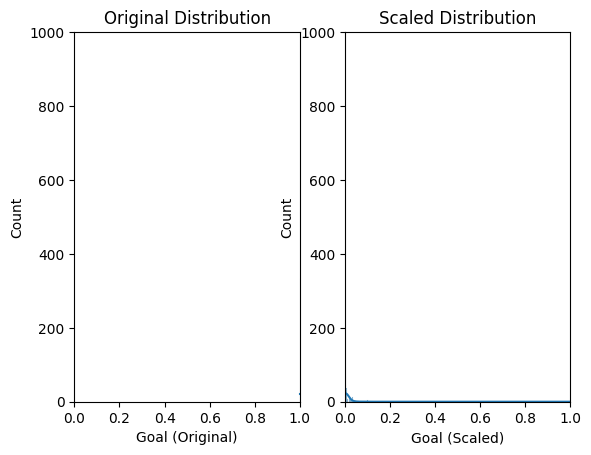

In [5]:
# Min-Max Scaling


 # 將所有的 goal 欄位轉換為數字，無法轉換的設為 NaN
KSdata['goal '] = pd.to_numeric(KSdata['goal '], errors='coerce') 


# 去除 NaN 值.
KSdata_cleaned = KSdata.dropna(subset=['goal '])
KSdata_cleaned= KSdata.head(1000)  # 使用 head(1000) 選取前 1000 筆
#choose column 'goal'
usedgoal = KSdata_cleaned['goal ']

# 將其轉換為 numpy 陣列並調整為列向量
usedgoal_array = usedgoal.to_numpy().reshape(-1, 1)  
print(usedgoal_array)
#scaling from 0 to 1
ScalingData = minmax_scaling(usedgoal_array, columns=[0])   #columns=[]  針對[]欄位進行minmax 

# 將縮放後的結果轉換回 DataFrame 才能使用pandas
ScalingData = pd.DataFrame(ScalingData, columns=['goal '])
print(ScalingData.head())

print("清理後數據集的大小:", len(KSdata_cleaned))
print("清理後數據的最小值與最大值:", KSdata_cleaned['goal '].min(), KSdata_cleaned['goal '].max())
print("縮放後數據的最小值與最大值:", ScalingData['goal '].min(), ScalingData['goal '].max())

# 繪製 XY 軸互換的分佈圖
fig, ax = plt.subplots(1, 2)

# 原始數據
sns.histplot(KSdata_cleaned['goal '], kde=True, ax=ax[0])
ax[0].set_title("Original Distribution")
ax[0].set_xlim(0, 1)  # 設定 X 軸範圍
ax[0].set_ylim(0, 1000)  # 設定 X 軸範圍
ax[0].set_xlabel("Goal (Original)")

# 縮放後的數據
sns.histplot(ScalingData['goal '], kde=True, ax=ax[1])
ax[1].set_title("Scaled Distribution")
ax[1].set_xlim(0, 1)  # 縮放後的數據範圍通常是 [0, 1]
ax[1].set_ylim(0, 1000)
ax[1].set_xlabel("Goal (Scaled)")

plt.show()

